Test R notebook

Validate assumptions for mixed-effects model with [this](https://ademos.people.uic.edu/Chapter18.html).


- try things with python first and then verify with R?

In [11]:
library(lme4)
# library(AER)
# library(dplyr)
# library(purrr)
# library(magrittr)
# library(ggplot2)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
head(data)

,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.091052e+18,1,2021-06-03 14:35:53.721000+00:00,undergrad,centre,False,22,0,0,1,⋯,1,1,1,Treatment,High,0.1,0.0,0.00,0.25,1.0000000
2,-1.091052e+18,1,2021-06-03 14:35:53.721000+00:00,undergrad,centre,False,22,0,0,1,⋯,1,1,1,Treatment,Low,0.1,0.1,0.50,0.50,0.5000000
3,-1.363632e+18,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,1,0,Treatment,High,0.2,0.2,0.25,0.50,0.5000000
4,-1.363632e+18,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,1,0,Treatment,Low,0.3,0.6,0.25,0.00,0.3333333
5,-1.782715e+18,1,2021-06-03 14:34:50.118000+00:00,graduateSchool,centreRight,False,36,1,0,0,⋯,0,0,1,Control,High,0.5,0.0,0.25,0.00,1.0000000
6,-1.782715e+18,1,2021-06-03 14:34:50.118000+00:00,graduateSchool,centreRight,False,36,1,0,0,⋯,0,0,1,Control,Low,0.5,0.4,0.25,0.25,0.5555556


## H1 and H3

In [12]:
md.affirms <- lmer(Affirms ~ condition * evidence + (1 | user_id), data = data)
summary(md.affirms)

Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -126

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7658 -0.5485 -0.1249  0.3175  2.2637 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01509  0.1228  
 Residual             0.01334  0.1155  
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                                 Estimate Std. Error t value
(Intercept)                     0.1714133  0.0247775   6.918
conditionTreatment             -0.0007122  0.0376823  -0.019
evidenceLow                    -0.0365357  0.0242513  -1.507
conditionTreatment:evidenceLow -0.0309557  0.0371741  -0.833

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.658              
evidenceLow -0.520  0.342       
cndtnTrtm:L  0.339 -0.524 -0.652

**Satterthwaite approximation for p-values**

In [13]:
coefs <- data.frame(coef(summary(md.affirms)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.affirms))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.affirms))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.1714132737,0.02477749,6.91810519,"0.1714132737, 0.02477749, 6.91810519",0.02477749
conditionTreatment,-0.0007122212,0.03768234,-0.01890066,"-0.0007122212, 0.03768234, -0.01890066",0.03768234
evidenceLow,-0.0365357496,0.02425126,-1.50655067,"-0.0365357496, 0.02425126, -1.50655067",0.02425126
conditionTreatment:evidenceLow,-0.0309557467,0.03717413,-0.83272273,"-0.0309557467, 0.03717413, -0.83272273",0.03717413


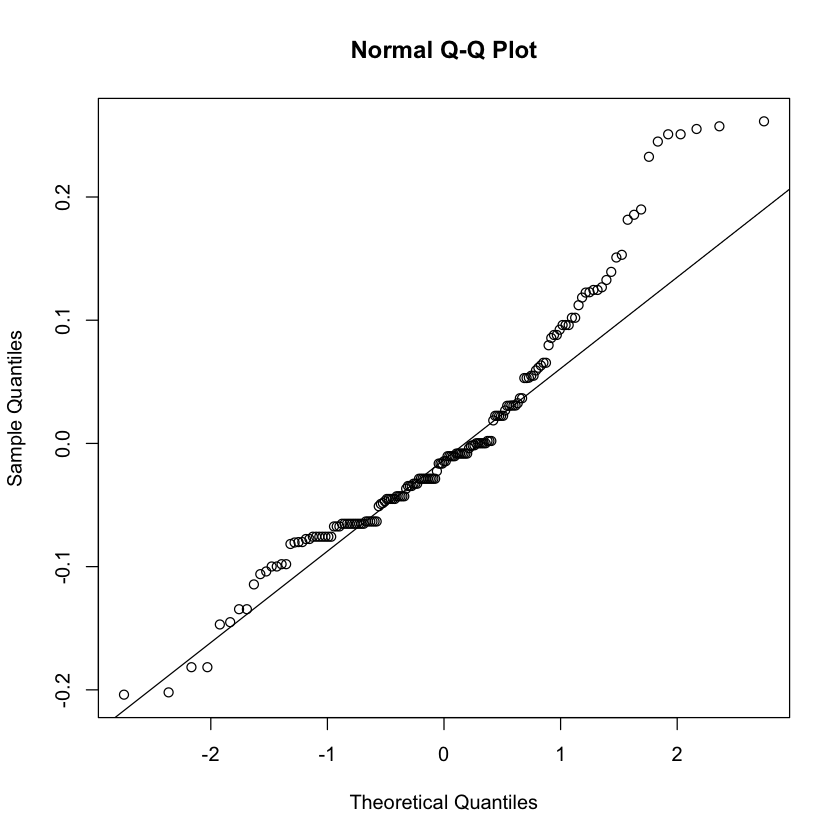

In [14]:
qqnorm(resid(md.affirms))
qqline(resid(md.affirms))

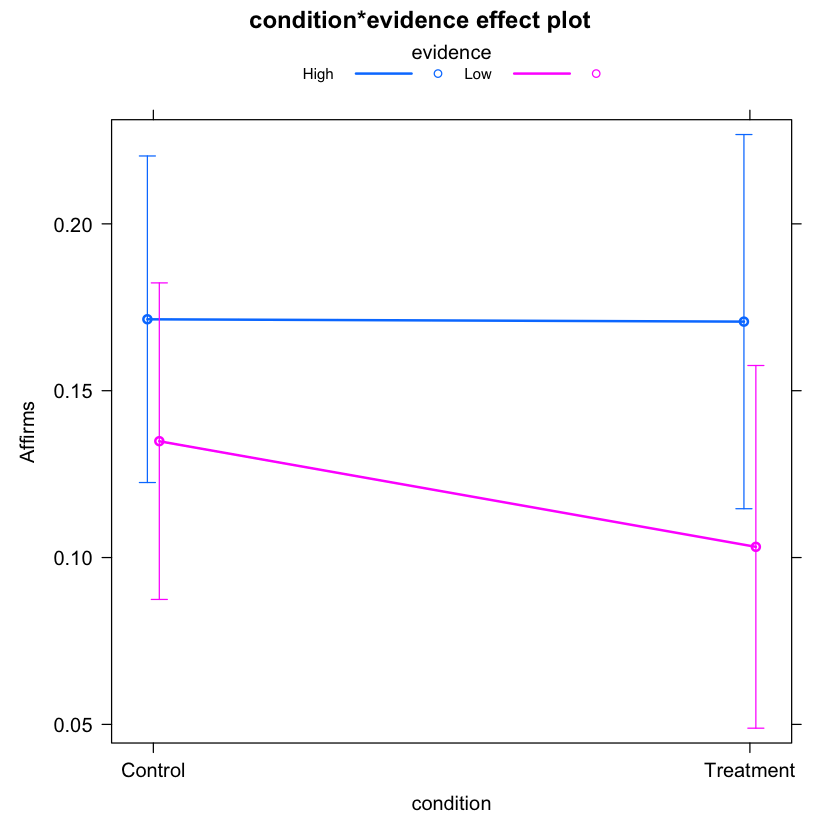

In [15]:
library(effects)
plot(allEffects(md.affirms), multiline=TRUE, ci.style="bars")

## H2 and H4

In [16]:
md.denies <- lmer(Denies ~ condition * evidence + (1 | user_id), data = data)
summary(md.denies)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: Denies ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -74.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8856 -0.5771 -0.2504  0.2946  3.5650 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 user_id  (Intercept) 4.022e-15 6.342e-08
 Residual             3.366e-02 1.835e-01
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.08000    0.02735   2.925
conditionTreatment              0.02588    0.04169   0.621
evidenceLow                     0.18122    0.03788   4.784
conditionTreatment:evidenceLow  0.05884    0.05775   1.019

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.656              
evidenceLow -0.722  0.474       
cndtnTrtm:L  0.474 -0.722 -0.656
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


**Satterthwaite approximation for p-values**

In [10]:
coefs <- data.frame(coef(summary(md.denies)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.denies))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.denies))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.08000000,0.02734904,2.9251485,"0.08000000, 0.02734904, 2.9251485",0.02734904
conditionTreatment,0.02588235,0.04168849,0.6208513,"0.02588235, 0.04168849, 0.6208513",0.04168849
evidenceLow,0.18122449,0.03787982,4.7841957,"0.18122449, 0.03787982, 4.7841957",0.03787982
conditionTreatment:evidenceLow,0.05883910,0.05774543,1.0189396,"0.05883910, 0.05774543, 1.0189396",0.05774543


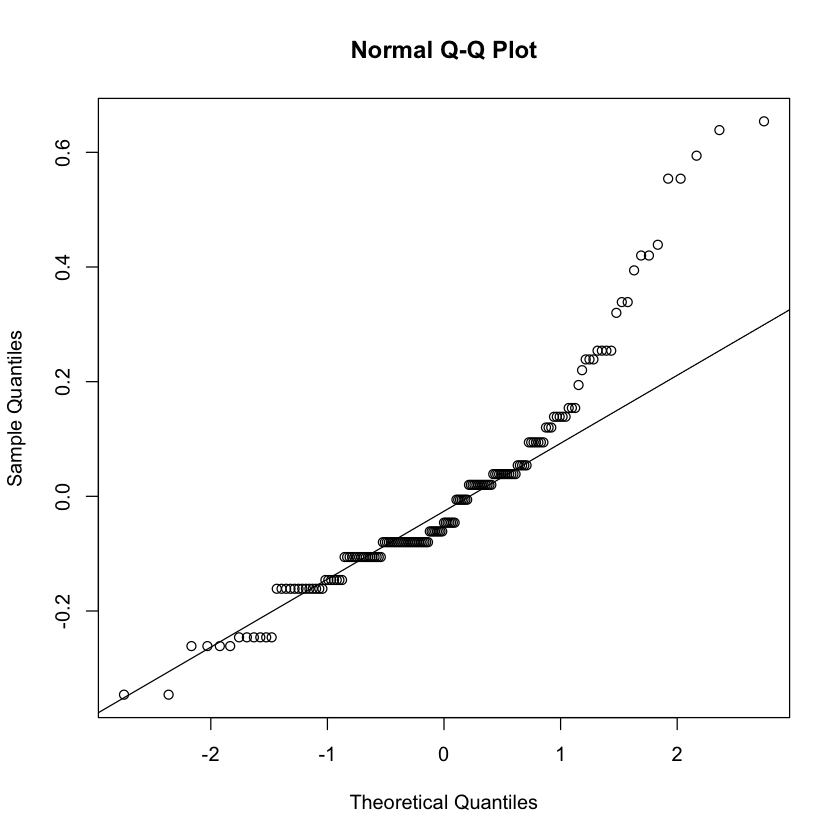

In [8]:
qqnorm(resid(md.denies))
qqline(resid(md.denies))  # points fall nicely onto the line - good!

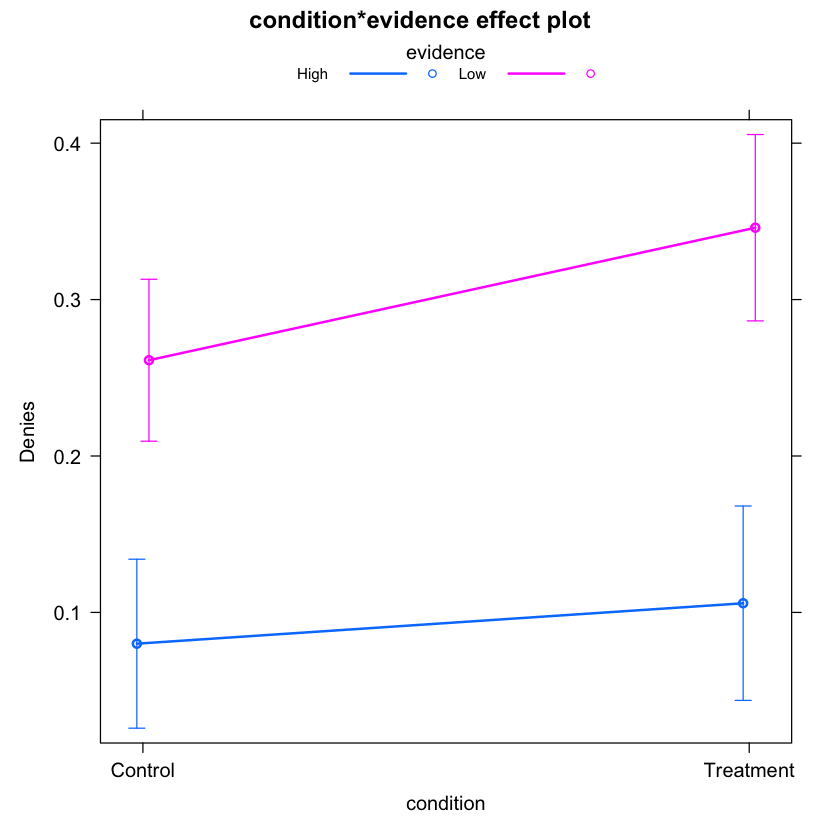

In [9]:
library(effects)
plot(allEffects(md.denies), multiline=TRUE, ci.style="bars")